In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.to_csv("./titanic.csv",index=False)

In [4]:
titanic_copy = titanic.copy()

In [5]:
titanic_copy

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
titanic.shape

(891, 15)

In [7]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
# checking for null values
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
#checking for duplicated rows ! 
titanic.duplicated().sum()

107

In [10]:
#removing duplicated rows 
titanic.drop_duplicates(inplace=True)

In [11]:
titanic.duplicated().sum()

0

In [12]:

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<p>Duplicated data's has been removed, now lets see for the null values and what can we do about it ! </p>

In [13]:
(titanic.isna().sum()/titanic.shape[0]) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            13.520408
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.255102
class           0.000000
who             0.000000
adult_male      0.000000
deck           74.234694
embark_town     0.255102
alive           0.000000
alone           0.000000
dtype: float64

##### we can remove the embarked and embark_town null values  , since to mee it seems like the 0.22 null values can be ignored

In [14]:
# removing embarked and embark_town columns ! 
titanic.dropna(subset=["embarked","embark_town"],inplace=True)

##### predicting age using regression method ! , thanks to deepseek ! :)


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Split into known and unknown age data
known_age = titanic[titanic['age'].notna()]
unknown_age = titanic[titanic['age'].isna()]

# Train a model (example)
model = RandomForestRegressor()
X_train = known_age[['pclass', 'fare', 'sibsp', 'parch']]
y_train = known_age['age']
model.fit(X_train, y_train)

# Predict missing ages
X_test = unknown_age[['pclass', 'fare', 'sibsp', 'parch']]
predicted_ages = model.predict(X_test)
titanic.loc[titanic['age'].isna(), 'age'] = predicted_ages

In [16]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           582
embark_town      0
alive            0
alone            0
dtype: int64

##### Now, let's use classification algorithm to mess up with this deck column !  But before that we need to check on some of the data's and carry on with preprocessing ! 


In [17]:
titanic['deck'].value_counts()

deck
C    59
B    44
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [18]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
titanic["class"].value_counts(),titanic["who"].value_counts(),titanic["sex"].value_counts(),titanic["who"].value_counts()

(class
 Third     405
 First     212
 Second    165
 Name: count, dtype: int64,
 who
 man      451
 woman    249
 child     82
 Name: count, dtype: int64,
 sex
 male      491
 female    291
 Name: count, dtype: int64,
 who
 man      451
 woman    249
 child     82
 Name: count, dtype: int64)

In [20]:
# creating a new column name adult_female based on her age , returns True if age >= 18 else, return false 
titanic['adult_female'] = (titanic['sex'] == 'female') & (titanic['age'] >= 18)

In [21]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult_female
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,True
888,0,3,female,16.575714,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,False


In [22]:
titanic["family_size"] = titanic["sibsp"] + titanic["parch"]

In [23]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult_female,family_size
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,1
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True,1
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True,0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True,1
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,True,5
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,True,0
888,0,3,female,16.575714,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,False,3
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,False,0


In [24]:
temp_df = titanic.copy()

#### we will be working with the copy of original data now, though i should have done this from the beginning ! 

In [25]:
temp_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult_female,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,0


In [26]:
temp_df["who"].value_counts()

who
man      451
woman    249
child     82
Name: count, dtype: int64

<p>We are changing categorical values into numerical values ! Using mapping,ordinalEncoder,OneHotEncoder whichever gives us the best options </p>

In [27]:
temp_df["sex_en"] = temp_df["sex"].map({'male' : 0,'female' : 1})
temp_df["who_en"] = temp_df["who"].map({'man' : 0,'woman' : 1,'child':2})
temp_df["adult_male_en"] = temp_df["adult_male"].astype(int)
temp_df["alive_en"] = temp_df["alive"].map({'no' : 0,'yes' : 1})
temp_df["alone_en"] = temp_df["alone"].astype(int)
temp_df["adult_female_en"] = temp_df["adult_female"].astype(int)
# temp_df["sex_en"] = temp_df["sex"].map({'male' : 0,'female' : 1})

In [28]:
temp_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'adult_female', 'family_size', 'sex_en', 'who_en',
       'adult_male_en', 'alive_en', 'alone_en', 'adult_female_en'],
      dtype='object')

##### USING ORDINAL ENCODING FOR  CLASS BECAUSE PRIORITY OF THIS COLUMN MATTERS 

In [29]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder

In [30]:
temp_df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,alive,alone,adult_female,family_size,sex_en,who_en,adult_male_en,alive_en,alone_en,adult_female_en
885,0,3,female,39.000000,0,5,29.125,Q,Third,woman,...,no,False,True,5,1,1,0,0,0,1
887,1,1,female,19.000000,0,0,30.000,S,First,woman,...,yes,True,True,0,1,1,0,1,1,1
888,0,3,female,16.575714,1,2,23.450,S,Third,woman,...,no,False,False,3,1,1,0,0,0,0
889,1,1,male,26.000000,0,0,30.000,C,First,man,...,yes,True,False,0,0,0,1,1,1,0
890,0,3,male,32.000000,0,0,7.750,Q,Third,man,...,no,True,False,0,0,0,1,0,1,0


In [31]:
### using ordinalEncoder 
oe = OrdinalEncoder()
temp_df["class_en"] = oe.fit_transform(temp_df[['class']])

In [32]:
temp_df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,alone,adult_female,family_size,sex_en,who_en,adult_male_en,alive_en,alone_en,adult_female_en,class_en
291,1,1,female,19.0,1,0,91.0792,C,First,woman,...,False,True,1,1,1,0,1,0,1,0.0
477,0,3,male,29.0,1,0,7.0458,S,Third,man,...,False,False,1,0,0,1,0,0,0,2.0
473,1,2,female,23.0,0,0,13.7917,C,Second,woman,...,True,True,0,1,1,0,1,1,1,1.0
810,0,3,male,26.0,0,0,7.8875,S,Third,man,...,True,False,0,0,0,1,0,1,0,2.0
251,0,3,female,29.0,1,1,10.4625,S,Third,woman,...,False,True,2,1,1,0,0,0,1,2.0


In [33]:
temp_df["embarked"].value_counts()

embarked
S    568
C    155
Q     59
Name: count, dtype: int64

In [34]:
temp_df["embark_town"].value_counts()

embark_town
Southampton    568
Cherbourg      155
Queenstown      59
Name: count, dtype: int64

In [35]:
temp_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,alone,adult_female,family_size,sex_en,who_en,adult_male_en,alive_en,alone_en,adult_female_en,class_en
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,...,False,False,1,0,0,1,0,0,0,2.0
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,...,False,True,1,1,1,0,1,0,1,0.0
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,...,True,True,0,1,1,0,1,1,1,2.0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,...,False,True,1,1,1,0,1,0,1,0.0
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,...,True,False,0,0,0,1,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,...,False,True,5,1,1,0,0,0,1,2.0
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,...,True,True,0,1,1,0,1,1,1,0.0
888,0,3,female,16.575714,1,2,23.4500,S,Third,woman,...,False,False,3,1,1,0,0,0,0,2.0
889,1,1,male,26.000000,0,0,30.0000,C,First,man,...,True,False,0,0,0,1,1,1,0,0.0


In [36]:
### USING LABEL FOR EMBARKED and EMBARK TOWN 

In [37]:

encoder = LabelEncoder()
temp_df["embarked_en"] = encoder.fit_transform(temp_df["embarked"])
temp_df["embark_town_en"] = encoder.fit_transform(temp_df["embark_town"])

In [38]:
temp_df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,family_size,sex_en,who_en,adult_male_en,alive_en,alone_en,adult_female_en,class_en,embarked_en,embark_town_en
885,0,3,female,39.000000,0,5,29.125,Q,Third,woman,...,5,1,1,0,0,0,1,2.0,1,1
887,1,1,female,19.000000,0,0,30.000,S,First,woman,...,0,1,1,0,1,1,1,0.0,2,2
888,0,3,female,16.575714,1,2,23.450,S,Third,woman,...,3,1,1,0,0,0,0,2.0,2,2
889,1,1,male,26.000000,0,0,30.000,C,First,man,...,0,0,0,1,1,1,0,0.0,0,0
890,0,3,male,32.000000,0,0,7.750,Q,Third,man,...,0,0,0,1,0,1,0,2.0,1,1


##### now let's create another df for just numerical values 

In [39]:
temp_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'adult_female', 'family_size', 'sex_en', 'who_en',
       'adult_male_en', 'alive_en', 'alone_en', 'adult_female_en', 'class_en',
       'embarked_en', 'embark_town_en'],
      dtype='object')

In [40]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 0 to 890
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   survived         782 non-null    int64   
 1   pclass           782 non-null    int64   
 2   sex              782 non-null    object  
 3   age              782 non-null    float64 
 4   sibsp            782 non-null    int64   
 5   parch            782 non-null    int64   
 6   fare             782 non-null    float64 
 7   embarked         782 non-null    object  
 8   class            782 non-null    category
 9   who              782 non-null    object  
 10  adult_male       782 non-null    bool    
 11  deck             200 non-null    category
 12  embark_town      782 non-null    object  
 13  alive            782 non-null    object  
 14  alone            782 non-null    bool    
 15  adult_female     782 non-null    bool    
 16  family_size      782 non-null    int64   
 17  se

In [41]:
df_num = temp_df.select_dtypes(exclude=["bool",'object'])

In [42]:
df_num.drop(columns=["class"],inplace=True)

In [43]:
titanic.isna().sum()

survived          0
pclass            0
sex               0
age               0
sibsp             0
parch             0
fare              0
embarked          0
class             0
who               0
adult_male        0
deck            582
embark_town       0
alive             0
alone             0
adult_female      0
family_size       0
dtype: int64

In [44]:
df_num

,survived,pclass,age,sibsp,parch,fare,deck,family_size,sex_en,who_en,adult_male_en,alive_en,alone_en,adult_female_en,class_en,embarked_en,embark_town_en
0,0,3,22.000000,1,0,7.2500,NaN,1,0,0,1,0,0,0,2.0,2,2
1,1,1,38.000000,1,0,71.2833,C,1,1,1,0,1,0,1,0.0,0,0
2,1,3,26.000000,0,0,7.9250,NaN,0,1,1,0,1,1,1,2.0,2,2
3,1,1,35.000000,1,0,53.1000,C,1,1,1,0,1,0,1,0.0,2,2
4,0,3,35.000000,0,0,8.0500,NaN,0,0,0,1,0,1,0,2.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.000000,0,5,29.1250,NaN,5,1,1,0,0,0,1,2.0,1,1
887,1,1,19.000000,0,0,30.0000,B,0,1,1,0,1,1,1,0.0,2,2
888,0,3,16.575714,1,2,23.4500,NaN,3,1,1,0,0,0,0,2.0,2,2
889,1,1,26.000000,0,0,30.0000,C,0,0,0,1,1,1,0,0.0,0,0


In [45]:
from sklearn.feature_selection import SelectKBest,chi2

##### now lets separate the data into known and unknown colun

In [46]:
known_data = df_num[df_num["deck"].notna()]
unknown_data = df_num[df_num["deck"].isna()]

In [47]:
known_data.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'deck',
       'family_size', 'sex_en', 'who_en', 'adult_male_en', 'alive_en',
       'alone_en', 'adult_female_en', 'class_en', 'embarked_en',
       'embark_town_en'],
      dtype='object')

In [48]:
known_data_x = known_data.loc[:,['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare',
       'family_size', 'sex_en', 'who_en', 'adult_male_en', 'alive_en',
       'alone_en', 'adult_female_en', 'class_en', 'embarked_en',
       'embark_town_en']]
known_data_y = known_data.loc[:,'deck']

In [49]:
selector = SelectKBest(score_func=chi2, k=5)
x_new = selector.fit_transform(known_data_x, known_data_y)

# Get selected feature names
selected_features = known_data_x.columns[selector.get_support()]
print("Top features:", selected_features)

Top features: Index(['pclass', 'age', 'fare', 'family_size', 'class_en'], dtype='object')


In [50]:
known_data_x = pd.DataFrame(known_data_x,columns=selected_features)

In [51]:
known_data_x["class_en"].value_counts()

class_en
0.0    172
1.0     16
2.0     12
Name: count, dtype: int64

In [52]:
known_data_y.value_counts()

deck
C    59
B    44
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [53]:
from imblearn.over_sampling import RandomOverSampler

In [54]:
ros = RandomOverSampler()
x,y = ros.fit_resample(known_data_x,known_data_y)

In [55]:
y.value_counts()

deck
A    59
B    59
C    59
D    59
E    59
F    59
G    59
Name: count, dtype: int64

In [56]:
x

,pclass,age,fare,family_size,class_en
0,1,38.0,71.2833,1,0.0
1,1,35.0,53.1000,1,0.0
2,1,54.0,51.8625,0,0.0
3,3,4.0,16.7000,2,2.0
4,1,58.0,26.5500,0,0.0
...,...,...,...,...,...
408,3,24.0,16.7000,2,2.0
409,3,29.0,10.4625,2,2.0
410,3,29.0,10.4625,2,2.0
411,3,2.0,10.4625,1,2.0


In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
# x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=50,test_size=0.2)

In [59]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=0.1)
    model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced', 
    )
    model.fit(x_train,y_train)

    print(i,model.score(x_test,y_test) * 100,model.score(x_train,y_train) * 100)
    



0 83.33333333333334 99.73045822102425
1 80.95238095238095 99.73045822102425
2 90.47619047619048 99.73045822102425
3 83.33333333333334 99.46091644204851
4 85.71428571428571 100.0
5 83.33333333333334 99.46091644204851
6 80.95238095238095 99.46091644204851
7 88.09523809523809 99.73045822102425
8 83.33333333333334 99.73045822102425
9 85.71428571428571 99.73045822102425
10 71.42857142857143 99.73045822102425
11 80.95238095238095 99.73045822102425
12 85.71428571428571 100.0
13 85.71428571428571 99.73045822102425
14 80.95238095238095 99.73045822102425
15 92.85714285714286 99.73045822102425
16 88.09523809523809 100.0
17 80.95238095238095 99.73045822102425
18 80.95238095238095 99.46091644204851
19 73.80952380952381 99.73045822102425
20 80.95238095238095 99.73045822102425
21 83.33333333333334 99.73045822102425
22 85.71428571428571 99.73045822102425
23 83.33333333333334 99.73045822102425
24 78.57142857142857 99.73045822102425
25 97.61904761904762 99.73045822102425
26 95.23809523809523 99.73045822

<p>The best bet seems to be at 33 , so lets use that </p>

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=33,test_size=0.1)

In [61]:


model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',   
    
)
model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200)

In [62]:
model.score(x_test,y_test) * 100,model.score(x_train,y_train)

(95.23809523809523, 0.9973045822102425)

In [63]:
x_predict = pd.DataFrame(unknown_data,columns=selected_features)

In [64]:
x_predict

,pclass,age,fare,family_size,class_en
0,3,22.000000,7.2500,1,2.0
2,3,26.000000,7.9250,0,2.0
4,3,35.000000,8.0500,0,2.0
5,3,23.645714,8.4583,0,2.0
7,3,2.000000,21.0750,4,2.0
...,...,...,...,...,...
882,3,22.000000,10.5167,0,2.0
883,2,28.000000,10.5000,0,1.0
885,3,39.000000,29.1250,5,2.0
888,3,16.575714,23.4500,3,2.0


In [65]:
predicted_decks = model.predict(x_predict)

In [66]:
predicted_decks

array(['F', 'F', 'F', 'F', 'F', 'G', 'F', 'F', 'F', 'F', 'D', 'F', 'E',
       'E', 'F', 'D', 'F', 'F', 'F', 'F', 'F', 'F', 'B', 'F', 'E', 'C',
       'D', 'F', 'F', 'G', 'G', 'G', 'F', 'F', 'F', 'F', 'F', 'E', 'F',
       'E', 'F', 'F', 'F', 'E', 'F', 'F', 'F', 'F', 'F', 'B', 'G', 'F',
       'G', 'F', 'F', 'F', 'F', 'E', 'F', 'F', 'F', 'F', 'F', 'F', 'A',
       'E', 'G', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'E', 'F', 'G', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'G', 'F', 'F', 'F', 'F', 'F', 'E', 'F', 'D', 'F', 'G',
       'F', 'E', 'F', 'E', 'F', 'F', 'F', 'D', 'E', 'F', 'G', 'F', 'E',
       'F', 'F', 'F', 'F', 'E', 'D', 'F', 'F', 'F', 'F', 'F', 'D', 'F',
       'F', 'G', 'G', 'F', 'E', 'F', 'F', 'D', 'F', 'F', 'E', 'B', 'G',
       'F', 'E', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'E', 'F', 'F',
       'F', 'D', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'E', 'F',
       'F', 'F', 'F', 'D', 'F', 'E', 'F', 'F', 'F', 'E', 'E', 'E

In [67]:
df_num.loc[df_num['deck'].isna(), 'deck'] = predicted_decks

In [68]:
df_num.head()

,survived,pclass,age,sibsp,parch,fare,deck,family_size,sex_en,who_en,adult_male_en,alive_en,alone_en,adult_female_en,class_en,embarked_en,embark_town_en
0,0,3,22.0,1,0,7.2500,F,1,0,0,1,0,0,0,2.0,2,2
1,1,1,38.0,1,0,71.2833,C,1,1,1,0,1,0,1,0.0,0,0
2,1,3,26.0,0,0,7.9250,F,0,1,1,0,1,1,1,2.0,2,2
3,1,1,35.0,1,0,53.1000,C,1,1,1,0,1,0,1,0.0,2,2
4,0,3,35.0,0,0,8.0500,F,0,0,0,1,0,1,0,2.0,2,2


In [69]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult_female,family_size
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,1
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True,1
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True,0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True,1
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,True,5
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,True,0
888,0,3,female,16.575714,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,False,3
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,False,0


In [70]:
# just trying playing with some values, !  if wrong , then fix this please ! 
(df_num[(df_num["adult_male_en"] == 1) & (df_num['alive_en'] == 1)].shape[0]/df_num.shape[0]) * 100

10.869565217391305

In [71]:
deck_encoder = OrdinalEncoder()
df_num["deck_en"] = deck_encoder.fit_transform(df_num[["deck"]])

In [72]:
df_num.drop(columns="deck",inplace=True)

In [73]:
df_num

,survived,pclass,age,sibsp,parch,fare,family_size,sex_en,who_en,adult_male_en,alive_en,alone_en,adult_female_en,class_en,embarked_en,embark_town_en,deck_en
0,0,3,22.000000,1,0,7.2500,1,0,0,1,0,0,0,2.0,2,2,5.0
1,1,1,38.000000,1,0,71.2833,1,1,1,0,1,0,1,0.0,0,0,2.0
2,1,3,26.000000,0,0,7.9250,0,1,1,0,1,1,1,2.0,2,2,5.0
3,1,1,35.000000,1,0,53.1000,1,1,1,0,1,0,1,0.0,2,2,2.0
4,0,3,35.000000,0,0,8.0500,0,0,0,1,0,1,0,2.0,2,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.000000,0,5,29.1250,5,1,1,0,0,0,1,2.0,1,1,5.0
887,1,1,19.000000,0,0,30.0000,0,1,1,0,1,1,1,0.0,2,2,1.0
888,0,3,16.575714,1,2,23.4500,3,1,1,0,0,0,0,2.0,2,2,5.0
889,1,1,26.000000,0,0,30.0000,0,0,0,1,1,1,0,0.0,0,0,2.0


<p>Now, we see that all our values are converted to numerical forms ! </p>

In [74]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 0 to 890
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   survived         782 non-null    int64  
 1   pclass           782 non-null    int64  
 2   age              782 non-null    float64
 3   sibsp            782 non-null    int64  
 4   parch            782 non-null    int64  
 5   fare             782 non-null    float64
 6   family_size      782 non-null    int64  
 7   sex_en           782 non-null    int64  
 8   who_en           782 non-null    int64  
 9   adult_male_en    782 non-null    int32  
 10  alive_en         782 non-null    int64  
 11  alone_en         782 non-null    int32  
 12  adult_female_en  782 non-null    int32  
 13  class_en         782 non-null    float64
 14  embarked_en      782 non-null    int32  
 15  embark_town_en   782 non-null    int32  
 16  deck_en          782 non-null    float64
dtypes: float64(4), int32(

In [75]:
df_num.isna().sum(),print(" duplicated values from here",df_num.duplicated().sum())

 duplicated values from here 4


(survived           0
 pclass             0
 age                0
 sibsp              0
 parch              0
 fare               0
 family_size        0
 sex_en             0
 who_en             0
 adult_male_en      0
 alive_en           0
 alone_en           0
 adult_female_en    0
 class_en           0
 embarked_en        0
 embark_town_en     0
 deck_en            0
 dtype: int64,
 None)

In [76]:
df_num.duplicated().sum()

4

In [77]:
df_num.drop_duplicates(inplace=True)

In [78]:
df_num.duplicated().sum()

0

In [79]:
df_num.drop(columns="survived",inplace=True)

<p>Removing survived because it is same as alive_en</p>

In [80]:
df_num

,pclass,age,sibsp,parch,fare,family_size,sex_en,who_en,adult_male_en,alive_en,alone_en,adult_female_en,class_en,embarked_en,embark_town_en,deck_en
0,3,22.000000,1,0,7.2500,1,0,0,1,0,0,0,2.0,2,2,5.0
1,1,38.000000,1,0,71.2833,1,1,1,0,1,0,1,0.0,0,0,2.0
2,3,26.000000,0,0,7.9250,0,1,1,0,1,1,1,2.0,2,2,5.0
3,1,35.000000,1,0,53.1000,1,1,1,0,1,0,1,0.0,2,2,2.0
4,3,35.000000,0,0,8.0500,0,0,0,1,0,1,0,2.0,2,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,3,39.000000,0,5,29.1250,5,1,1,0,0,0,1,2.0,1,1,5.0
887,1,19.000000,0,0,30.0000,0,1,1,0,1,1,1,0.0,2,2,1.0
888,3,16.575714,1,2,23.4500,3,1,1,0,0,0,0,2.0,2,2,5.0
889,1,26.000000,0,0,30.0000,0,0,0,1,1,1,0,0.0,0,0,2.0


In [81]:
df_num.describe()

,pclass,age,sibsp,parch,fare,family_size,sex_en,who_en,adult_male_en,alive_en,alone_en,adult_female_en,class_en,embarked_en,embark_town_en,deck_en
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,2.249357,29.774062,0.526992,0.419023,34.712987,0.946015,0.372751,0.529563,0.575835,0.411311,0.565553,0.298201,1.249357,1.526992,1.526992,4.071979
std,0.853206,14.151670,0.988956,0.839346,52.280326,1.521080,0.483848,0.678612,0.494533,0.492388,0.496003,0.457762,0.853206,0.805334,0.805334,1.537171
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000
50%,3.000000,28.500000,0.000000,0.000000,15.900000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.000000,2.000000,5.000000
75%,3.000000,38.000000,1.000000,1.000000,33.890600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,5.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,6.000000


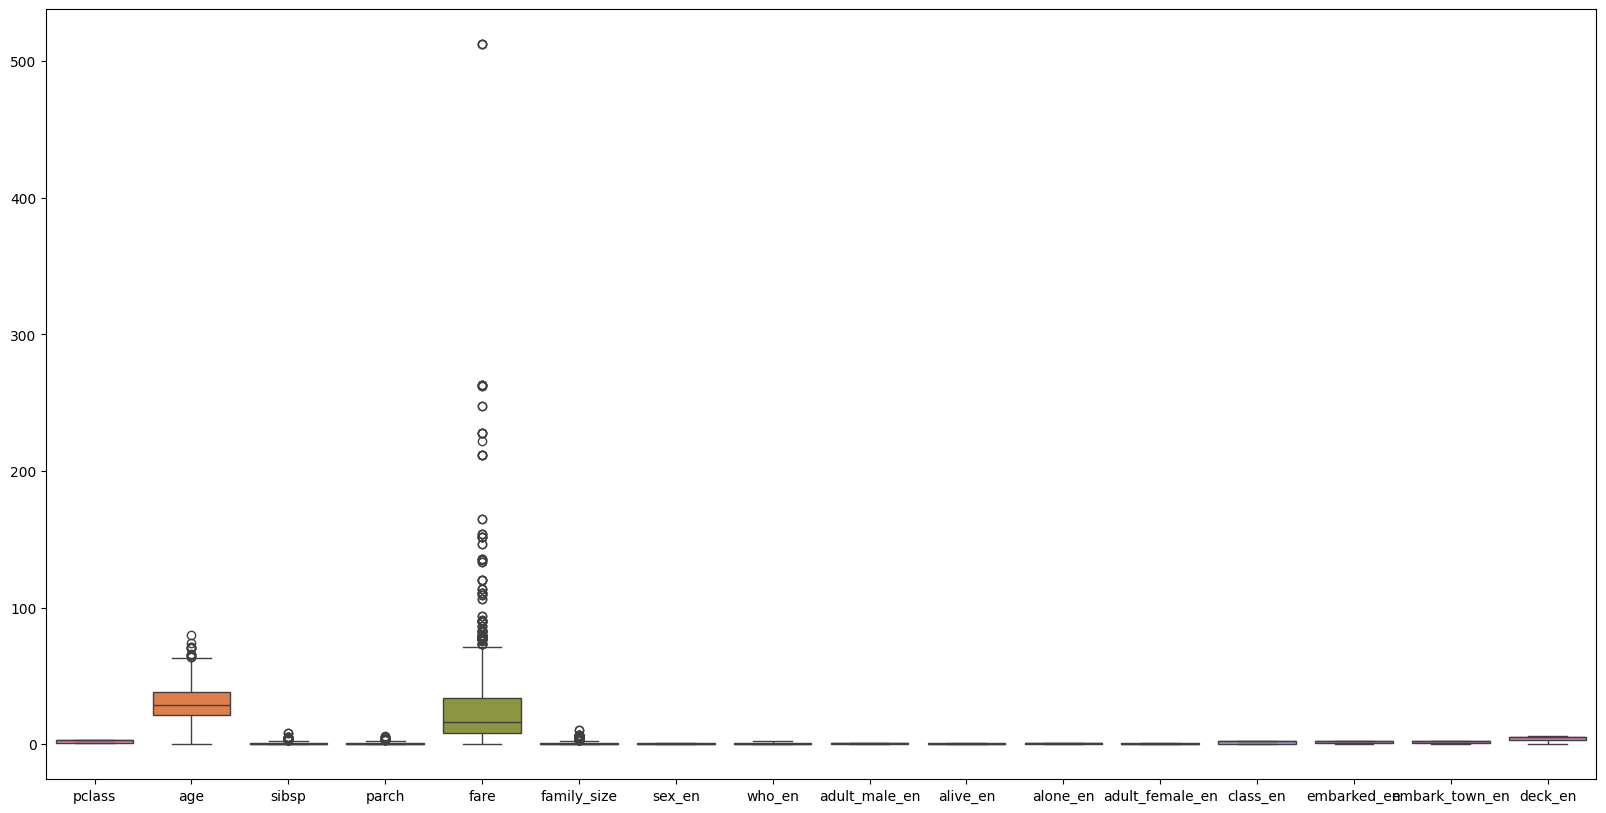

In [82]:
plt.figure(figsize=(20,10))
sns.boxplot(df_num)
plt.show()

In [83]:
# # adding 1 because there is one person all the time, maybe his family number is 0
# df_num["family_size"] = df_num["family_size"] + 1

In [84]:
# okay so we added one for once , and now we are not going to touch it ! 

In [85]:
df_num["family_size"].value_counts()

family_size
0     440
1     154
2     101
3      28
5      22
4      13
6      12
7       6
10      2
Name: count, dtype: int64

In [86]:
df_num.describe()

,pclass,age,sibsp,parch,fare,family_size,sex_en,who_en,adult_male_en,alive_en,alone_en,adult_female_en,class_en,embarked_en,embark_town_en,deck_en
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,2.249357,29.774062,0.526992,0.419023,34.712987,0.946015,0.372751,0.529563,0.575835,0.411311,0.565553,0.298201,1.249357,1.526992,1.526992,4.071979
std,0.853206,14.151670,0.988956,0.839346,52.280326,1.521080,0.483848,0.678612,0.494533,0.492388,0.496003,0.457762,0.853206,0.805334,0.805334,1.537171
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000
50%,3.000000,28.500000,0.000000,0.000000,15.900000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.000000,2.000000,5.000000
75%,3.000000,38.000000,1.000000,1.000000,33.890600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,5.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,6.000000


here, lets not look at the encoded data, because all this data consists of encoded data --> classification , so our only concern right now is the other data which is not encoded or not belong to classification feature 